In [1]:
import cv2
import numpy as np
from skimage import io
from matplotlib import pyplot as plt

In [2]:
def adaptive(grayscaled, blocksize=15, param=5):
    return cv2.adaptiveThreshold(grayscaled, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, blocksize, param)


def blur_threshold(grayscaled, th, k_size=5):
    image1 = cv2.GaussianBlur(grayscaled,(k_size,k_size),0) 
    ret, image2 = cv2.threshold(image1, th, 255, cv2.THRESH_BINARY)
    return image2

def otsu(grayscaled):
    retval, im = cv2.threshold(grayscaled, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return im



In [3]:
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage


def watershed_seg(thresh, distance=15):
    D = ndimage.distance_transform_edt(thresh)
    localMax = peak_local_max(D, indices=False, min_distance=distance, labels=thresh)
    # perform a connected component analysis on the local peaks,
    # using 8-connectivity, then appy the Watershed algorithm
    markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
    labels = watershed(-D, markers, mask=thresh)
    print("[INFO] {} unique segments found".format(len(np.unique(labels)) - 1))

    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    # cvt to BGR for display
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0
    image = img.copy()
    for label in np.unique(labels):
    # if the label is zero, we are examining the 'background'
    # so simply ignore it
        if label == 0:
            continue

        # otherwise, allocate memory for the label region and draw
        # it on the mask
        mask = np.zeros(gray.shape, dtype="uint8")
        mask[labels == label] = 255 
        #cv2_imshow(mask)#[labels == label] = 255   
        # detect contours in the mask and grab the largest one
        cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
            cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        c = max(cnts, key=cv2.contourArea)

        # draw a circle enclosing the object
        ((x, y), r) = cv2.minEnclosingCircle(c)
        cv2.circle(image, (int(x), int(y)), int(r), (0, 255, 0), 1)
    return image, labeled_img
    


## Image 1

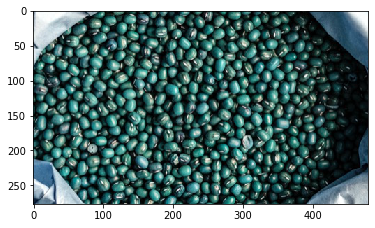

In [761]:
img = cv2.cvtColor(io.imread("tasks/count/count1.jpg"), cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)

In [763]:
# thresh = cv2.threshold(gray, 120, 255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
thresh = adaptive(gray, blocksize=31, param=6)
# thresh = otsu(gray)
# thresh = blur_threshold(gray,th=180, k_size=41)
# thresh = blur_threshold(gray,th=30, k_size=41)
overlayed, labeled_image = watershed_seg(thresh, distance=5)
plt.figure(figsize=(20, 20))
plt.subplot(1, 3, 1)
plt.imshow(thresh)
plt.subplot(1, 3, 2)
plt.imshow(cv2.addWeighted(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), 1, labeled_image, 0.5, 0))
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

[INFO] 589 unique segments found


## Image 2

In [764]:
img = cv2.cvtColor(io.imread("tasks/count/count2.jpg"), cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)

[INFO] 231 unique segments found


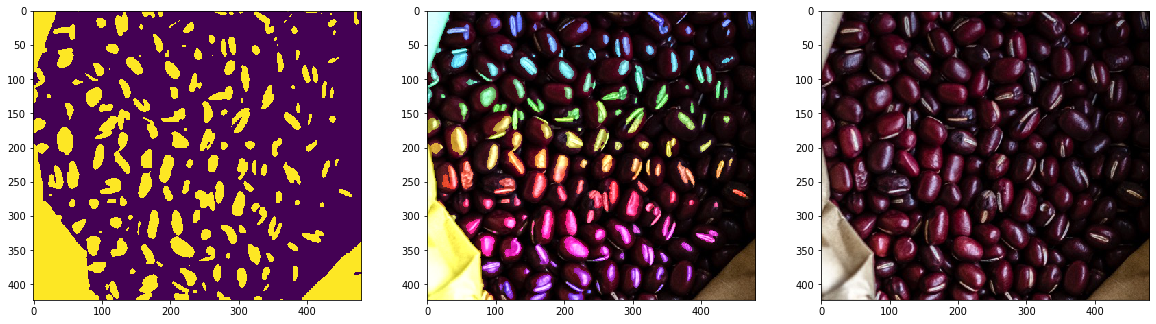

In [765]:
# thresh = cv2.threshold(gray, 120, 255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
# thresh = adaptive(gray, blocksize=59, param=1)
# thresh = otsu(gray)
# thresh = blur_threshold(gray,th=180, k_size=41)
thresh = blur_threshold(gray,th=50, k_size=11)
overlayed, labeled_image = watershed_seg(thresh, distance=5)
plt.figure(figsize=(20, 20))
plt.subplot(1, 3, 1)
plt.imshow(thresh)
plt.subplot(1, 3, 2)
plt.imshow(cv2.addWeighted(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), 1, labeled_image, 0.5, 0))
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## Image 3

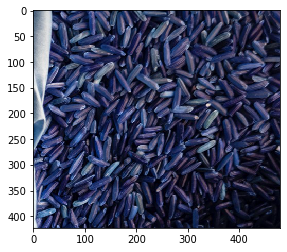

In [767]:
img = cv2.cvtColor(io.imread("tasks/count/count3.jpg"), cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)

[INFO] 377 unique segments found


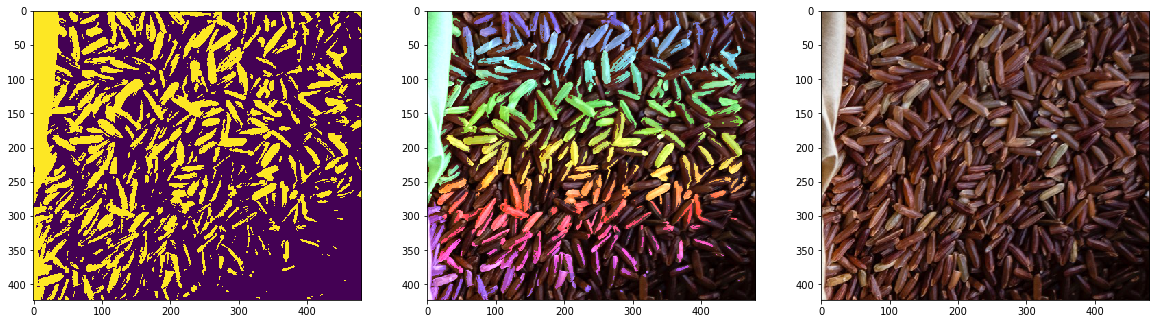

In [768]:
# thresh = cv2.threshold(gray, 120, 255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
# thresh = adaptive(gray, blocksize=59, param=1)
thresh = otsu(gray)
# thresh = blur_threshold(gray,th=180, k_size=41)
# thresh = blur_threshold(gray,th=40, k_size=51)

overlayed, labeled_image = watershed_seg(thresh, distance=10)
plt.figure(figsize=(20, 20))
plt.subplot(1, 3, 1)
plt.imshow(thresh)
plt.subplot(1, 3, 2)
plt.imshow(cv2.addWeighted(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), 1, labeled_image, 0.5, 0))
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## Image 4

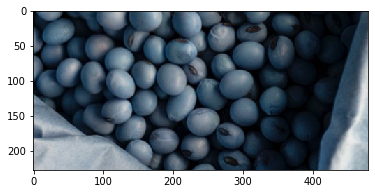

In [769]:
img = cv2.cvtColor(io.imread("tasks/count/count4.jpg"), cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)

[INFO] 33 unique segments found


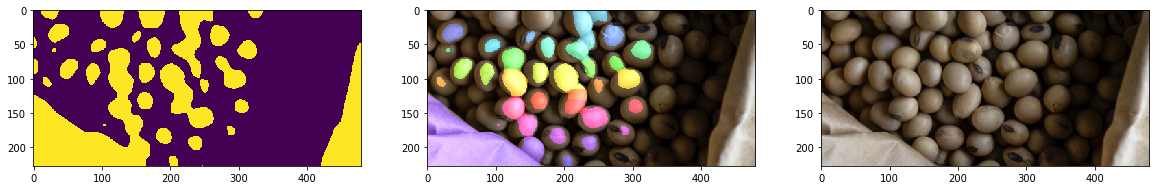

In [770]:
# thresh = cv2.threshold(gray, 120, 255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
# thresh = adaptive(gray, blocksize=59, param=1)
# thresh = otsu(gray)
# thresh = blur_threshold(gray,th=180, k_size=41)
thresh = blur_threshold(gray,th=90, k_size=31)
overlayed, labeled_image = watershed_seg(thresh, distance=5)
plt.figure(figsize=(20, 20))
plt.subplot(1, 3, 1)
plt.imshow(thresh)
plt.subplot(1, 3, 2)
plt.imshow(cv2.addWeighted(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), 1, labeled_image, 0.5, 0))
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

### Image 5

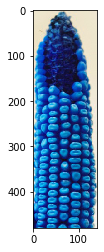

In [771]:
img = cv2.cvtColor(io.imread("tasks/count/count5.jpg"), cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)

[INFO] 88 unique segments found


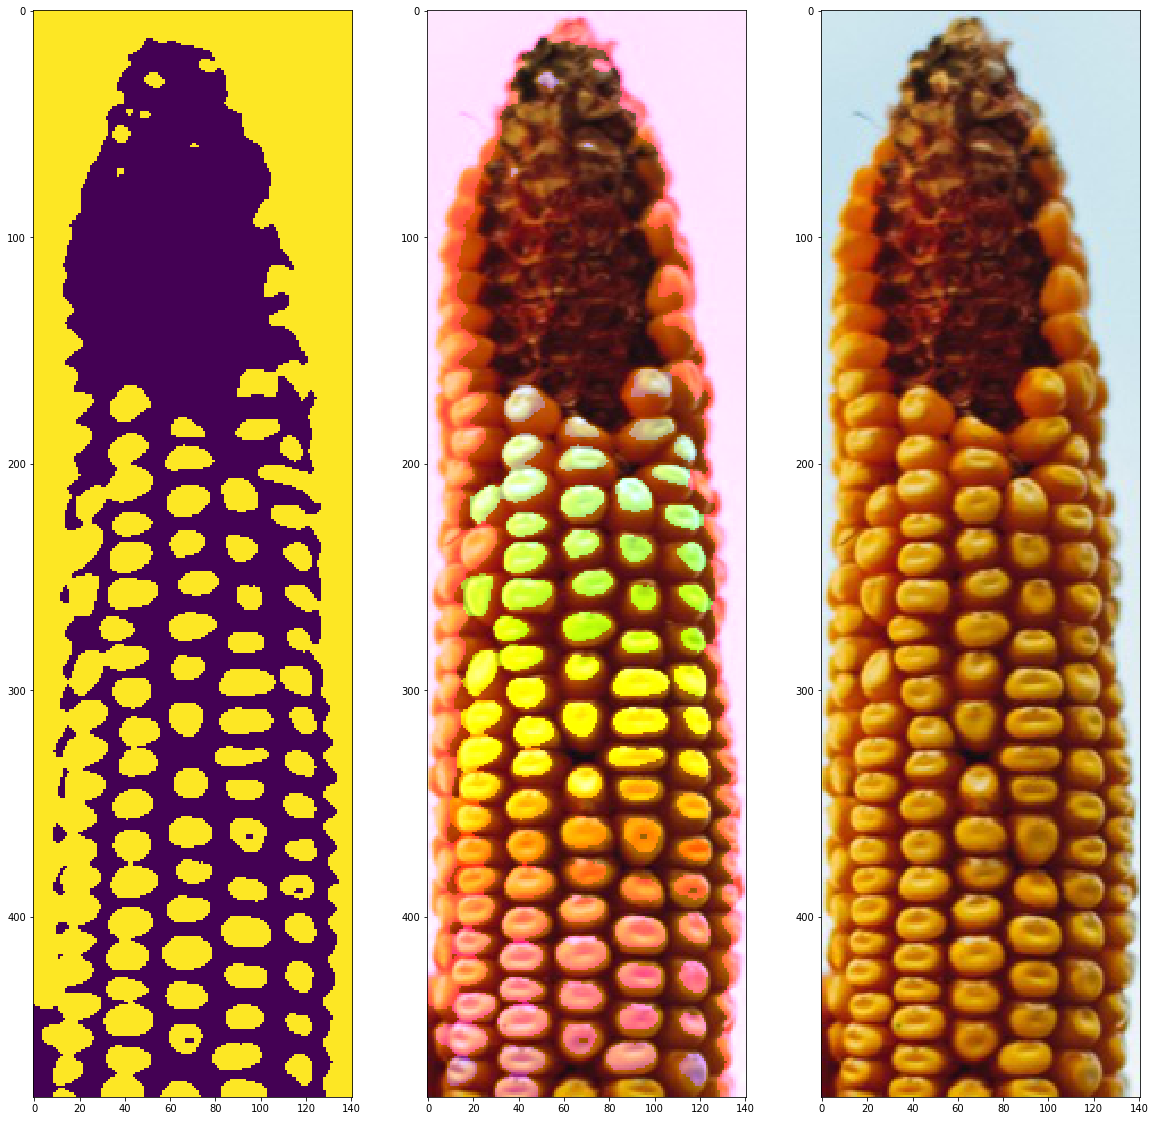

In [772]:
# thresh = cv2.threshold(gray, 140, 255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
# thresh = adaptive(gray, blocksize=31, param=1)
# thresh = otsu(gray)
# thresh = blur_threshold(gray,th=180, k_size=41)
thresh = blur_threshold(gray,th=110, k_size=9)
overlayed, labeled_image = watershed_seg(thresh, distance=10)
plt.figure(figsize=(20, 20))
plt.subplot(1, 3, 1)
plt.imshow(thresh)
plt.subplot(1, 3, 2)
plt.imshow(cv2.addWeighted(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), 1, labeled_image, 0.5, 0))
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## image 6

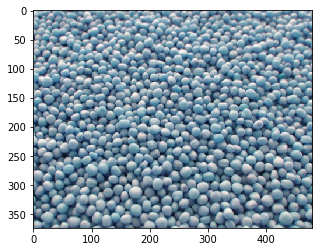

In [773]:
img = cv2.cvtColor(io.imread("tasks/count/count6.jpg"), cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)

[INFO] 782 unique segments found


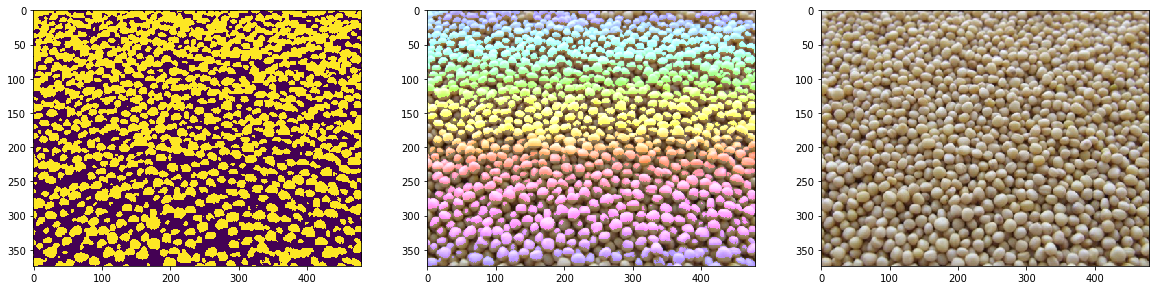

In [774]:
# thresh = cv2.threshold(gray, 140, 255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
# thresh = adaptive(gray, blocksize=31, param=1)
thresh = otsu(gray)
# thresh = blur_threshold(gray,th=180, k_size=41)
# thresh = blur_threshold(gray,th=150, k_size=3)
overlayed, labeled_image = watershed_seg(thresh, distance=5)
plt.figure(figsize=(20, 20))
plt.subplot(1, 3, 1)
plt.imshow(thresh)
plt.subplot(1, 3, 2)
plt.imshow(cv2.addWeighted(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), 1, labeled_image, 0.5, 0))
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## Image 7

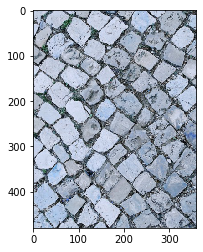

In [776]:
img = cv2.cvtColor(io.imread("tasks/count/count7.jpg"), cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)

In [777]:
# thresh = cv2.threshold(gray, 140, 255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
# thresh = adaptive(gray, blocksize=31, param=1)
# thresh = otsu(gray)
# thresh = blur_threshold(gray,th=180, k_size=41)
thresh = blur_threshold(gray,th=140, k_size=9)
overlayed, labeled_image = watershed_seg(thresh, distance=15)
plt.figure(figsize=(20, 20))
plt.subplot(1, 3, 1)
plt.imshow(thresh)
plt.subplot(1, 3, 2)
plt.imshow(cv2.addWeighted(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), 1, labeled_image, 0.5, 0))
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

[INFO] 83 unique segments found


## Image 8

In [778]:
img = cv2.cvtColor(io.imread("tasks/count/count8.jpg"), cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)

[INFO] 107 unique segments found


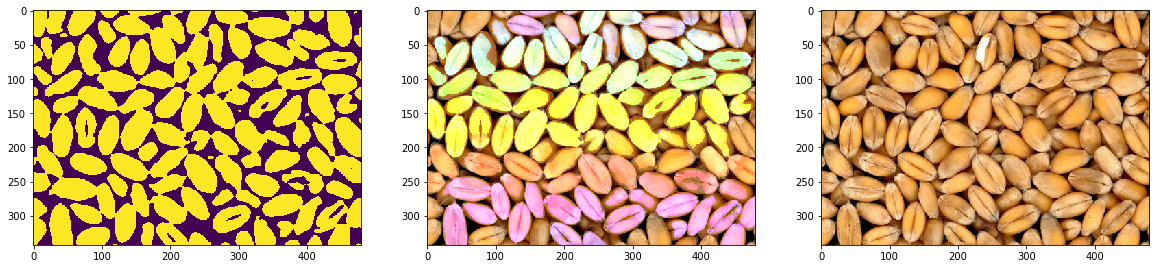

In [779]:
# thresh = cv2.threshold(gray, 140, 255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
# thresh = adaptive(gray, blocksize=31, param=1)
# thresh = otsu(gray)
# thresh = blur_threshold(gray,th=180, k_size=41)
thresh = blur_threshold(gray,th=140, k_size=11)
overlayed, labeled_image = watershed_seg(thresh, distance=15)
plt.figure(figsize=(20, 20))
plt.subplot(1, 3, 1)
plt.imshow(thresh)
plt.subplot(1, 3, 2)
plt.imshow(cv2.addWeighted(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), 1, labeled_image, 0.5, 0))
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## Image 9

In [630]:
img = cv2.cvtColor(io.imread("tasks/count/count9.jpg"), cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)

In [726]:
# thresh = cv2.threshold(gray, 30, 255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
thresh = adaptive(cv2.blur(gray, (5, 5)), blocksize=19, param=9)
# thresh = otsu(gray)
# thresh = blur_threshold(gray,th=150, k_size=11)
# thresh = blur_threshold(gray,th=50, k_size=11)

overlayed, labeled_image = watershed_seg(thresh, distance=20)
plt.figure(figsize=(20, 20))
plt.subplot(1, 3, 1)
plt.imshow(thresh)
plt.subplot(1, 3, 2)
plt.imshow(cv2.addWeighted(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), 1, labeled_image, 0.5, 0))
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

[INFO] 24 unique segments found


## Image 10

In [727]:
img = cv2.cvtColor(io.imread("tasks/count/count10.jpg"), cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)

In [751]:
# thresh = cv2.threshold(gray, 30, 255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
# thresh = adaptive(cv2.blur(gray, (5, 5)), blocksize=19, param=30)
# thresh = otsu(gray)
thresh = blur_threshold(gray,th=50, k_size=21)
# thresh = blur_threshold(gray,th=50, k_size=11)

overlayed, labeled_image = watershed_seg(thresh, distance=40)
plt.figure(figsize=(20, 20))
plt.subplot(1, 3, 1)
plt.imshow(thresh)
plt.subplot(1, 3, 2)
plt.imshow(cv2.addWeighted(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), 1, labeled_image, 0.5, 0))
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

[INFO] 11 unique segments found


## Image 11

In [754]:
img = cv2.cvtColor(io.imread("tasks/count/count11.jpg"), cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)

[INFO] 4 unique segments found


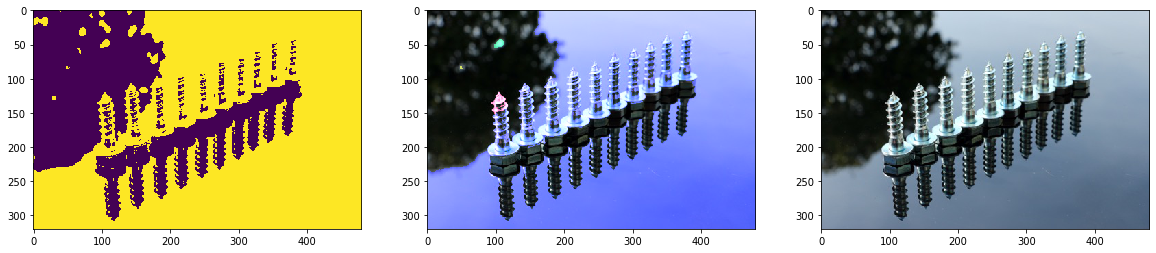

In [760]:
# thresh = cv2.threshold(gray, 30, 255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
# thresh = adaptive(cv2.blur(gray, (5, 5)), blocksize=19, param=30)
# thresh = otsu(gray)
# thresh = blur_threshold(gray,th=50, k_size=21)
# thresh = blur_threshold(gray,th=50, k_size=11)

overlayed, labeled_image = watershed_seg(thresh, distance=40)
plt.figure(figsize=(20, 20))
plt.subplot(1, 3, 1)
plt.imshow(thresh)
plt.subplot(1, 3, 2)
plt.imshow(cv2.addWeighted(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), 1, labeled_image, 0.5, 0))
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))